In [0]:
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression


Q1: Consider the dataset x = c(1.57, 1.25, 2.80, 0.43). Suppose we want to minimize the weighted version of least squares for mu given by sum( w * (x - mu) ^ 2 ) where w = c(2, 2, 1, 1). That is, the first two observation are weighted double the second two. What is the optimal value of mu?

In [0]:
x = np.array([1.57, 1.25, 2.80, 0.43])
w = np.array([2, 2, 1, 1])
x_wsum = sum(x*w)
w_sum = sum(w)
mu = x_wsum/w_sum
mu

1.4783333333333335

Q2: Consider the shhs datset distributed over slack. Use linear regression with bmi to predict log(rdi4p + 1). Report the coefficients and a scatterplot with the fitted line.


In [0]:
shhs1 = pd.read_csv("shhs1.csv") 
shhs1['logrdi4p'] = np.log(shhs1['rdi4p']+1)
shhs1.head(4)

,Unnamed: 0,pptid,waist,COPD15,ASTHMA15,slp_lat,time_bed,timest1p,timest2p,times34p,timeremp,rdi4p,StLOutP,StOnsetP,SlpPrdP,Staging1,Staging2,Staging3,Staging4,Staging5,RestAn1,RestAn2,RestAn3,RestAn4,HTNDerv_s1,shhs1_tcvd,gender,age_s1,smokstat_s1,WASO,bmi_s1,logrdi4p
0,1,1,86.0,0.0,0.0,NaN,440.5,6.258322,60.852196,19.307590,13.581891,1.438083,28,28,375.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0,1,55,2.0,65.0,21.777553,0.891212
1,2,2,107.0,0.0,0.0,NaN,225.0,0.824176,65.659340,16.758242,16.758242,17.802198,0,0,182.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,78,0.0,43.0,32.950680,2.933974
2,3,3,82.0,0.0,0.0,NaN,431.5,4.881451,40.306835,42.817295,11.994421,4.853556,167,167,358.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,77,0.0,73.0,24.114150,1.767049
3,4,4,85.0,0.0,0.0,14.0,358.5,2.990033,29.401993,52.325581,15.282393,0.797342,54,82,301.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,48,0.0,43.5,20.185185,0.586309


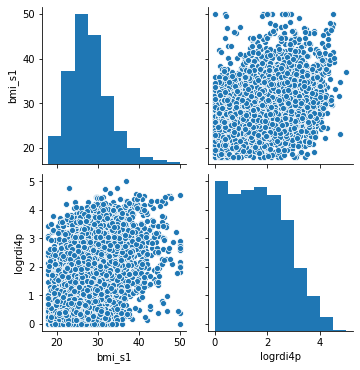

In [0]:
sns.pairplot(shhs1, vars = ['bmi_s1', 'logrdi4p'])

[1.6909490524388107, 0.07648599151230165]


Text(0, 0.5, 'log(rdi4p+1)')

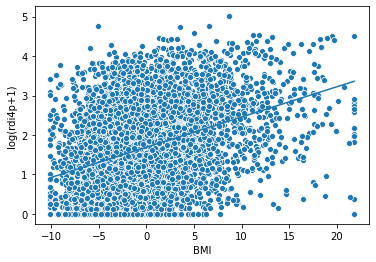

In [0]:
df = {'x': x, 'y': y}
df = pd.DataFrame(data=df)
df_filtered = df.dropna()

x = df_filtered['x'] -np.mean(df_filtered['x'])
y = df_filtered['y']

## get the slope on the training data
beta1 = st.pearsonr(x, y)[0] * np.std(y) / np.std(x)
beta0 = np.mean(y) - np.mean(x) * beta1
print([beta0, beta1])

sns.scatterplot(x, y)
## add a line
sns.lineplot(x, beta0 + beta1 * x)

plt.xlabel('BMI')
plt.ylabel('log(rdi4p+1)')

LinregressResult(slope=0.07648599151230175, intercept=1.690949052438807, rvalue=0.36743643840291873, pvalue=1.2027582935043808e-183, stderr=0.002551125352413094)


Text(0, 0.5, 'log(rdi4p+1)')

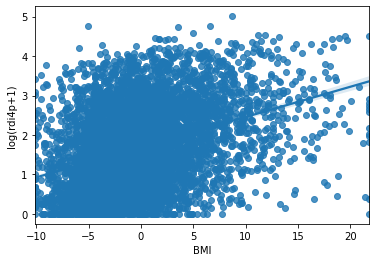

In [0]:
model = st.linregress(x = x, y = y)
print(st.linregress(x = x, y = y))
sns.regplot(x, y)

plt.xlabel('BMI')
plt.ylabel('log(rdi4p+1)')

We get the intercept as and slope as slope=0.0765, intercept=1.691.

Q3: Using your formula from the previous question, predict rdi4p for a person with a bmi = 30.

In [0]:

value = math.exp(beta0 + beta1*(30-28.16189))-1

print(value)

5.243486237620613


We get our rdi4p predicted value for a person with BMI = 30 as 5.24.